In [1]:
#setup 
import numpy as np
import pandas as pd 
from tkinter import filedialog
import matplotlib.pyplot as plt
import os 
import glob
import csv
import itertools

In [2]:
#Dialog box 
#initialdir='/Desktop/UROP'
#filename= filedialog.askopenfilename(initialdir=initialdir,title='Select a File', filetypes=(("ASC Files",".ASC"),))
#How do you make this able to select multiple files during one opening
#find a way to conjoin selected data files

In [3]:
file_location = os.path.join('*.ASC')
filenames = glob.glob(file_location)
print(filenames)
#ALZ3UM.asc data seemed to be to be high and throwing off normalization 
    #so i prevented it from being selected at this part 
#go back into project file and change ALZ3UM.asc back to ALZ3UM.ASC

['INZ3UM.ASC', 'GAZ3UM.ASC', 'ZNO3UM3.ASC']


In [4]:
#Compliling Files Into List of Lists
df=[]
for element in filenames:
    df.append(pd.read_csv(element))
print(df)

[     Wavelength  Filler  Intensity  Unnamed: 3
0     531.77081     1.0   393210.0         NaN
1     531.84149     1.0   393210.0         NaN
2     531.91216     1.0   214121.0         NaN
3     531.98284     1.0    23412.0         NaN
4     532.05351     1.0    11086.0         NaN
..          ...     ...        ...         ...
571   571.76997     1.0     1472.0         NaN
572   571.83939     1.0     1486.0         NaN
573   571.90881     1.0     1524.0         NaN
574   571.97823     1.0     1502.0         NaN
575   572.04764     1.0     1794.0         NaN

[576 rows x 4 columns],      Wavelength  Filler  Intensity  Unnamed: 3
0     531.77081     1.0   393210.0         NaN
1     531.84149     1.0   393210.0         NaN
2     531.91216     1.0   197919.0         NaN
3     531.98284     1.0    22679.0         NaN
4     532.05351     1.0    10607.0         NaN
..          ...     ...        ...         ...
571   571.76997     1.0     1052.0         NaN
572   571.83939     1.0     1002.0

In [5]:
#Remove Extra Columns
for columns in df:
    del columns['Filler']
    del columns['Unnamed: 3']
print(df)

[     Wavelength  Intensity
0     531.77081   393210.0
1     531.84149   393210.0
2     531.91216   214121.0
3     531.98284    23412.0
4     532.05351    11086.0
..          ...        ...
571   571.76997     1472.0
572   571.83939     1486.0
573   571.90881     1524.0
574   571.97823     1502.0
575   572.04764     1794.0

[576 rows x 2 columns],      Wavelength  Intensity
0     531.77081   393210.0
1     531.84149   393210.0
2     531.91216   197919.0
3     531.98284    22679.0
4     532.05351    10607.0
..          ...        ...
571   571.76997     1052.0
572   571.83939     1002.0
573   571.90881     1058.0
574   571.97823     1118.0
575   572.04764     1317.0

[576 rows x 2 columns],      Wavelength  Intensity
0     531.77081   393210.0
1     531.84149   393210.0
2     531.91216   168125.0
3     531.98284    17131.0
4     532.05351     7678.0
..          ...        ...
571   571.76997     1257.0
572   571.83939     1289.0
573   571.90881     1311.0
574   571.97823     1260.0
575 

In [6]:
print(list(itertools.chain.from_iterable(df)))

['Wavelength', 'Intensity', 'Wavelength', 'Intensity', 'Wavelength', 'Intensity']


In [7]:
flat_list = []
for sublist in df:
    for item in sublist:
        flat_list.append(item)
print(flat_list)

['Wavelength', 'Intensity', 'Wavelength', 'Intensity', 'Wavelength', 'Intensity']


In [8]:
#is there a way to combine the columns into one group so it would be 576 rows x 8 columns?
#methods i tried above only added the headings to a list and lost the rest of the data
#pd.concat?

In [9]:
#CSV METHOD of combining raman files
#Taken from old code using csv to get data that works 
with open('output.csv', 'w') as writer:
    readers = [open(filename) for filename in filenames]
    for lines in zip(*readers):
        print(' '.join([line.strip() for line in lines]), file=writer)

In [10]:
#getting rid of filler and NaN columns
#add back 9,11
dr=pd.read_csv('output.csv', usecols=[0,2,3,5,6,8], skipinitialspace=True)
print(dr)

     Wavelength  Intensity  Wavelength.1  Intensity.1  Wavelength.2  \
0     531.77081   393210.0     531.77081     393210.0     531.77081   
1     531.84149   393210.0     531.84149     393210.0     531.84149   
2     531.91216   214121.0     531.91216     197919.0     531.91216   
3     531.98284    23412.0     531.98284      22679.0     531.98284   
4     532.05351    11086.0     532.05351      10607.0     532.05351   
..          ...        ...           ...          ...           ...   
571   571.76997     1472.0     571.76997       1052.0     571.76997   
572   571.83939     1486.0     571.83939       1002.0     571.83939   
573   571.90881     1524.0     571.90881       1058.0     571.90881   
574   571.97823     1502.0     571.97823       1118.0     571.97823   
575   572.04764     1794.0     572.04764       1317.0     572.04764   

     Intensity.2  
0       393210.0  
1       393210.0  
2       168125.0  
3        17131.0  
4         7678.0  
..           ...  
571       1257

Text(0, 0.5, 'Intensity')

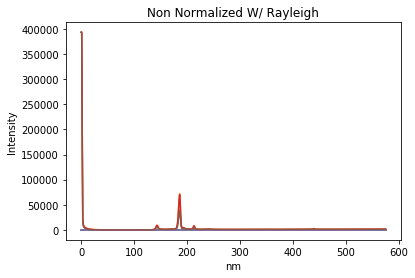

In [11]:
#Plotting graph non normalized with rayleigh line
plt.plot(dr)
plt.title('Non Normalized W/ Rayleigh')
plt.xlabel('nm')
plt.ylabel('Intensity')

In [12]:
#skipping first 300 rows to get rid of rayliegh line 
#add back 9,11
dp=pd.read_csv('output.csv', usecols=[0,2,3,5,6,8], skipinitialspace=True, skiprows=[i for i in range (1,300)])
print(dp)

     Wavelength  Intensity  Wavelength.1  Intensity.1  Wavelength.2  \
0     552.80539      898.0     552.80539        637.0     552.80539   
1     552.87541      941.0     552.87541        672.0     552.87541   
2     552.94543      942.0     552.94543        591.0     552.94543   
3     553.01545      886.0     553.01545        585.0     553.01545   
4     553.08546      968.0     553.08546        669.0     553.08546   
..          ...        ...           ...          ...           ...   
272   571.76997     1472.0     571.76997       1052.0     571.76997   
273   571.83939     1486.0     571.83939       1002.0     571.83939   
274   571.90881     1524.0     571.90881       1058.0     571.90881   
275   571.97823     1502.0     571.97823       1118.0     571.97823   
276   572.04764     1794.0     572.04764       1317.0     572.04764   

     Intensity.2  
0         1000.0  
1          993.0  
2          946.0  
3         1017.0  
4         1009.0  
..           ...  
272       1257

Text(0, 0.5, 'Intensity')

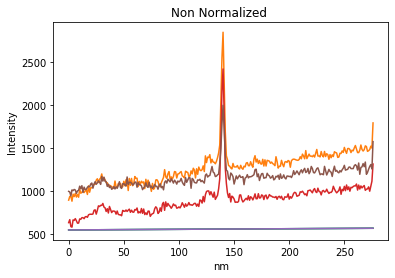

In [13]:
#Plotting graph not normalized without rayliegh line  
#One line still shows up much higher than the rest 
plt.plot(dp)
plt.title('Non Normalized ')
plt.xlabel('nm')
plt.ylabel('Intensity')

In [14]:
#seperating out Intensity to be normalized 
#add back 11
di=pd.read_csv('output.csv',usecols=[2,5,8], skipinitialspace=True, skiprows=[i for i in range (1,300)])
print(di)

     Intensity  Intensity.1  Intensity.2
0        898.0        637.0       1000.0
1        941.0        672.0        993.0
2        942.0        591.0        946.0
3        886.0        585.0       1017.0
4        968.0        669.0       1009.0
..         ...          ...          ...
272     1472.0       1052.0       1257.0
273     1486.0       1002.0       1289.0
274     1524.0       1058.0       1311.0
275     1502.0       1118.0       1260.0
276     1794.0       1317.0       1577.0

[277 rows x 3 columns]


In [15]:
#find max value 
#onty chooses columns that start with I ie Intensity columns 
cols = list(filter(lambda x: x.startswith('I'), dp.columns))
dp['maxf'] = dp[cols].max(axis=1)
print(dp)
#found max value of overall rows but not overall columns 

     Wavelength  Intensity  Wavelength.1  Intensity.1  Wavelength.2  \
0     552.80539      898.0     552.80539        637.0     552.80539   
1     552.87541      941.0     552.87541        672.0     552.87541   
2     552.94543      942.0     552.94543        591.0     552.94543   
3     553.01545      886.0     553.01545        585.0     553.01545   
4     553.08546      968.0     553.08546        669.0     553.08546   
..          ...        ...           ...          ...           ...   
272   571.76997     1472.0     571.76997       1052.0     571.76997   
273   571.83939     1486.0     571.83939       1002.0     571.83939   
274   571.90881     1524.0     571.90881       1058.0     571.90881   
275   571.97823     1502.0     571.97823       1118.0     571.97823   
276   572.04764     1794.0     572.04764       1317.0     572.04764   

     Intensity.2    maxf  
0         1000.0  1000.0  
1          993.0   993.0  
2          946.0   946.0  
3         1017.0  1017.0  
4         10

In [16]:
#seperate wavelegnth 
dw=pd.read_csv('output.csv', skipinitialspace=True, usecols=[0], skiprows=1, header=None)
print(dw)
#nm --> cm^-1
Excitation_Wavelength=531
#first part of conversion 
a=10**7/Excitation_Wavelength
print(a)
#second part of conversion  
#should i use a for loop to make b evaluated for every row 
b=[10**7/x[1] for x in dw]
#added together
#should this step and the previous one be one step in order to append it to the end of the dataframe.
#cm=[a-b]
#append new values to dataframe as cm^-1
#dw.append(???)


             0
0    531.77081
1    531.84149
2    531.91216
3    531.98284
4    532.05351
..         ...
571  571.76997
572  571.83939
573  571.90881
574  571.97823
575  572.04764

[576 rows x 1 columns]
18832.391713747646


TypeError: 'int' object is not subscriptable

In [ ]:
#Plotting graph not normalized in cm^-1 
plt.plot()
plt.title('Non Normalized')
plt.xlabel('cm-1')
plt.ylabel('Intensity')